In [1]:
%pylab inline
import csv
import os, os.path
import seaborn as sns
sns.set_context('talk')

Populating the interactive namespace from numpy and matplotlib


In [6]:
def load_metadata(exp_key, prefix = './', print_meta = True):
    '''
    Loads the metadata, which contains all the parameters used for the simulation
    BE CAREFUL: The parameters are set as global variables!!
    If print_meta == True, it prints the values of the imported parameters
    '''
    
    infile =open(prefix+'eexp_'+exp_key+'_meta.csv', mode='r')
    reader = csv.reader(infile)
    meta = list(reader)
    infile.close()
    
    global mTa, sTa, tg, MTs_start, MTs_stop, MTs_step, STs_start, STs_stop, STs_step
    
    mTa = float(meta[0][1])
    sTa = float(meta[1][1])
    tg = float(meta[2][1])
    MTs_start = float(meta[3][1])
    MTs_stop = float(meta[4][1])
    MTs_step = float(meta[5][1])
    STs_start = float(meta[6][1])
    STs_stop = float(meta[7][1])
    STs_step = float(meta[8][1])
    if print_meta:
        print(meta)
    
    return meta

def get_keys(Fnames):
    EXP_KEY = ['']*len(Fnames)
    for i in range(len(Fnames)):
        EXP_KEY[i] = Fnames[i].split('_')[1]
    return EXP_KEY

In [7]:
dir_load = './edata/'

# Get metadata file names in dir_load
F_meta = sorted([name for name in os.listdir(dir_load) if os.path.isfile(os.path.join(dir_load, name)) and name.endswith("csv")])
# Get matrix file names in dir_load
F_npy = sorted([name for name in os.listdir(dir_load) if os.path.isfile(os.path.join(dir_load, name)) and name.endswith("npy")])

# Create the metaMatrix :O using the metadata from the first file
EXP_KEY = get_keys(F_meta)
meta = load_metadata(EXP_KEY[0], prefix=dir_load, print_meta=False)
MTs = np.arange(MTs_start,MTs_stop,MTs_step)
STs = np.arange(STs_start,STs_stop,STs_step)

# metaMatrix
NNN = np.zeros((len(EXP_KEY), len(MTs), len(STs)))
# STa
STa = np.zeros(len(EXP_KEY))
# Here we assume the same mTa for all of them
for i in range(len(EXP_KEY)):
    meta = load_metadata(EXP_KEY[i], prefix=dir_load, print_meta=False)
    STa[i] = sTa
    NNN[i, :, :] = np.load(dir_load+F_npy[i])

In [15]:
def plot_heatmap(MTs, STs, MN, mTa, MTs_step, exp_key = None):
    
    #Indices of E(T_s) values for max fitness as a function of std
    max_MTs_vs_std = np.argmax(MN, axis=0)
    #Indices of std(T_s) values for max fitness as a function of E(T_s)
    max_STs_vs_mean = np.argmax(MN, axis=1)

    plt.figure(figsize=(8,5))
    y_conv = np.arange(len(max_MTs_vs_std))
    plt.plot(max_MTs_vs_std+0.5, y_conv+0.5, '--')
    x_conv = np.arange(len(max_STs_vs_mean))
    plt.plot(x_conv+0.5, max_STs_vs_mean+0.5, '--')
    # ax = sns.heatmap(MN.T/n0, yticklabels=STs, xticklabels=MTs)
    ax = sns.heatmap(MN.T, yticklabels=False, xticklabels=False)
#     plt.locator_params(nbins = 5, tight=)
    plt.vlines(np.where(abs(MTs-mTa) <= MTs_step/2)[0][0]+0.5, 0,len(y_conv), color='r', linestyles='--')
    ax.invert_yaxis()
    plt.ylabel('Standard deviation')
    plt.xlabel('Mean lag time')
    plt.title('$t_a=$'+str(mTa))
    if exp_key:
        plt.savefig('./exp_'+exp_key+'_hmap.png')
        

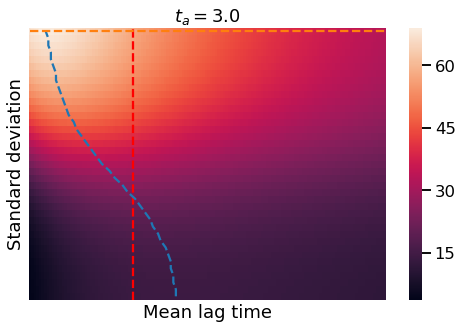

In [31]:
plot_heatmap(MTs, STa, NNN[:,:,0].T, mTa, MTs_step, exp_key = None)

In [23]:
len(MTs)

140

In [24]:
len(STa)

39

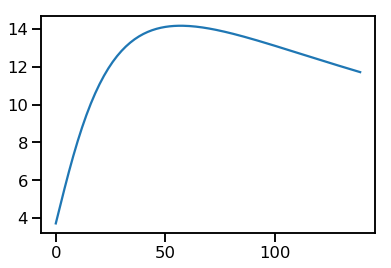

In [28]:
plt.plot(NNN[0,:,0])

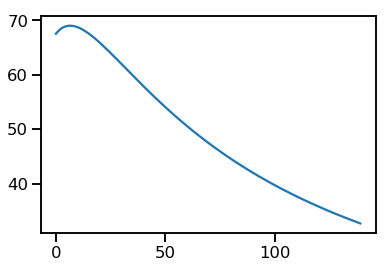

In [30]:
plt.plot(NNN[38,:,0])